In [2]:
import lightkurve as lk
from scipy.optimize import curve_fit
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 1: TYC 8170-690-1

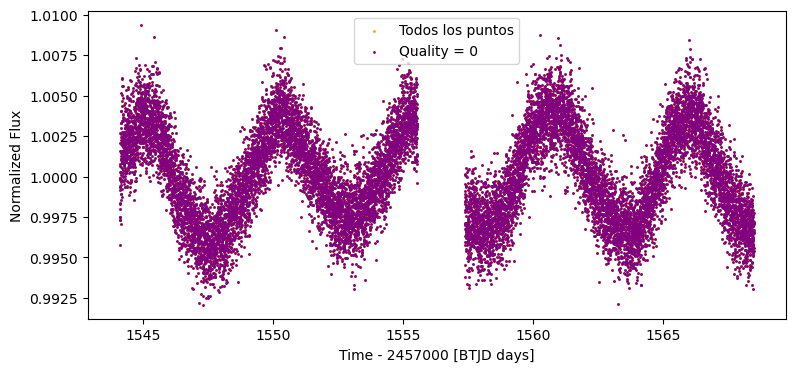

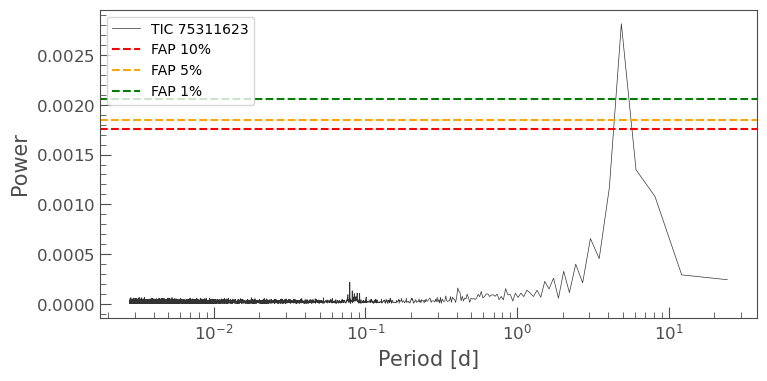

Periodo calculado: 4.872757002420576 d
Periodo real: 5.23983


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

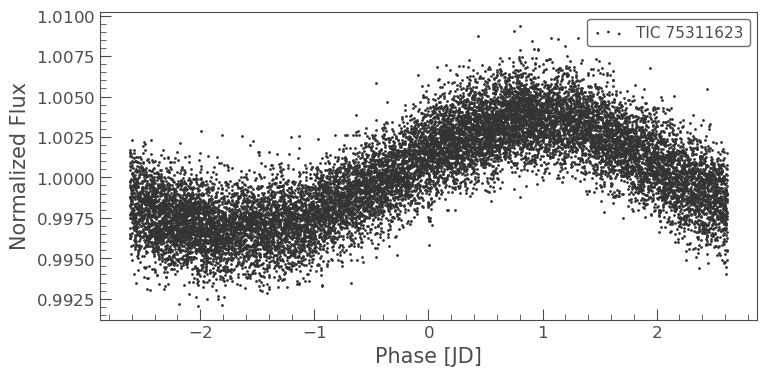

In [123]:
# OBJETO 1: TYC 8170-690-1

TIC = 'TIC 75311623'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author='SPOC', sector=9).download()
lc = sector_data.remove_nans().normalize()
# lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=5.23983
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [122]:
## TPFPLOTTER
!python tpfplotter.py 75311623 --maglim 6 --sector 9 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC75311623_S9.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")


===== RESULTADOS =====
Contaminación (fracción) = 13.108514
Contaminación (%) = 1310.851%


## Probamos con sector 8

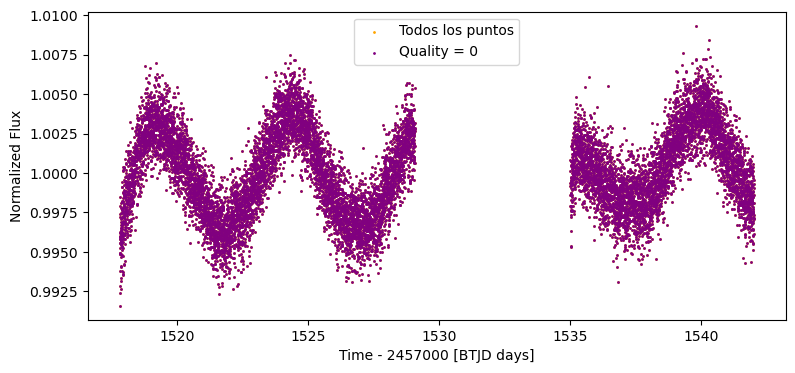

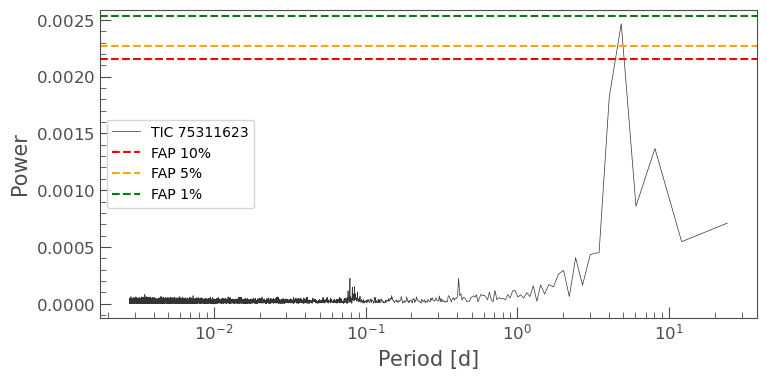

Periodo calculado: 4.837870495242533 d
Periodo real: 5.23983


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

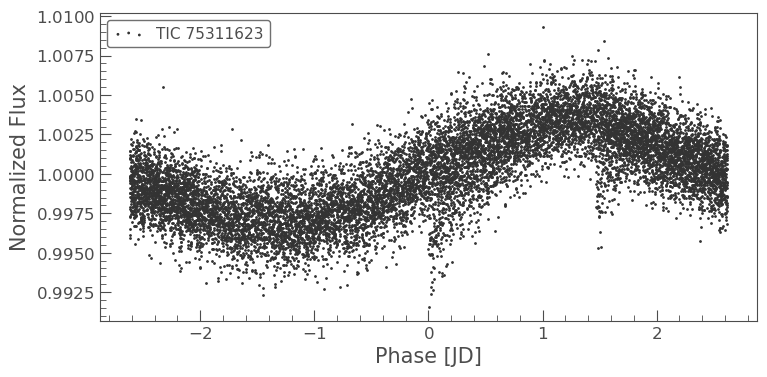

In [5]:
# OBJETO 1: TYC 8170-690-1

TIC = 'TIC 75311623'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author='SPOC', sector=8).download()
lc = sector_data.remove_nans().normalize()
# lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=5.23983
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [6]:
## TPFPLOTTER
!python tpfplotter.py 75311623 --maglim 6 --sector 8 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC75311623_S8.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

Workaround solutions for the Gaia Archive issues following the infrastructure upgrade: https://www.cosmos.esa.int/web/gaia/news#WorkaroundArchive
     tpfplotter       

* Working on TIC75311623 (ra = 138.797285825794, dec = -47.4748515142227) ...
	 WARNING! There are more than one DR3 ids for this DR2 ID, assuming the first one...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC75311623_S8.pdf
	 --> Gaia close sources saved in file: Gaia_TIC75311623_S8.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 13.108514
Contaminación (%) = 1310.851%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


## Probamos con el sector 1 --> no existen datos

## Todos los sectores combined

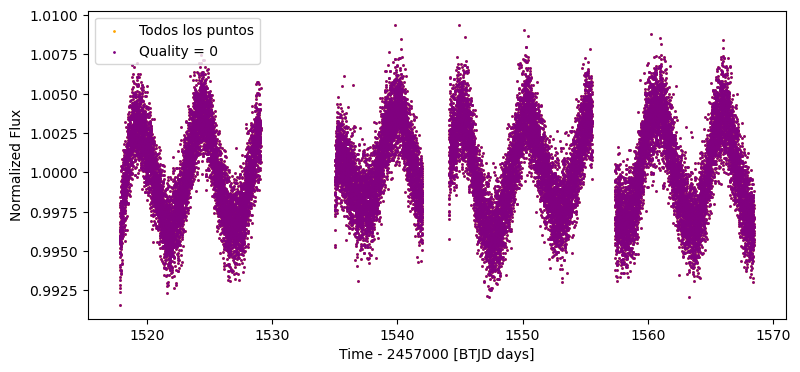

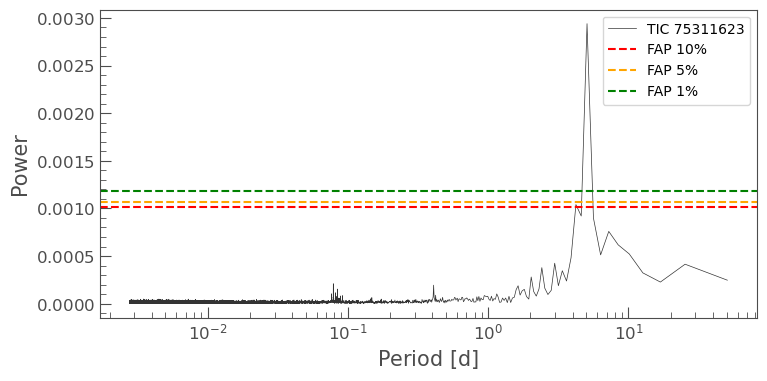

Periodo calculado: 5.066425784365151 d
Periodo real: 5.23983


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

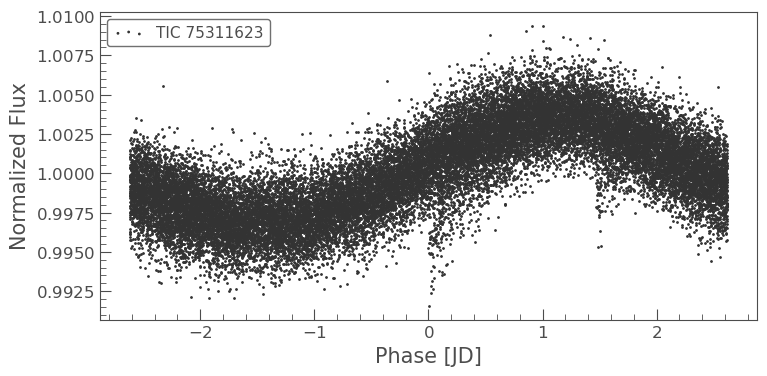

In [10]:
# OBJETO 1: TYC 8170-690-1

TIC = 'TIC 75311623'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author='SPOC', sector=[8, 9]).download_all()
lc = sector_data.stitch().remove_nans().normalize()
# lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=5.23983
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

# OBJETO 2: HD 15629

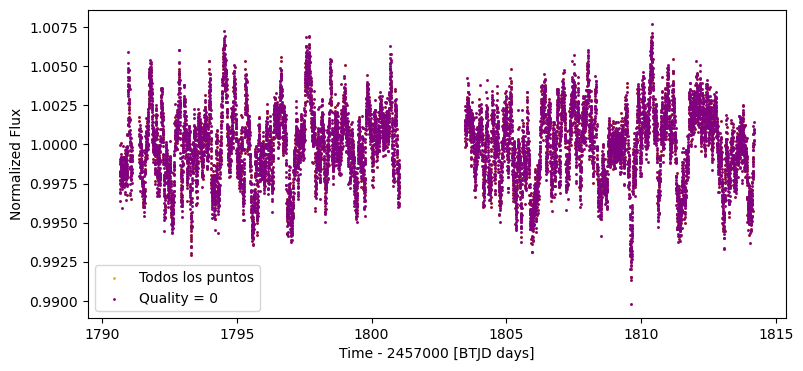

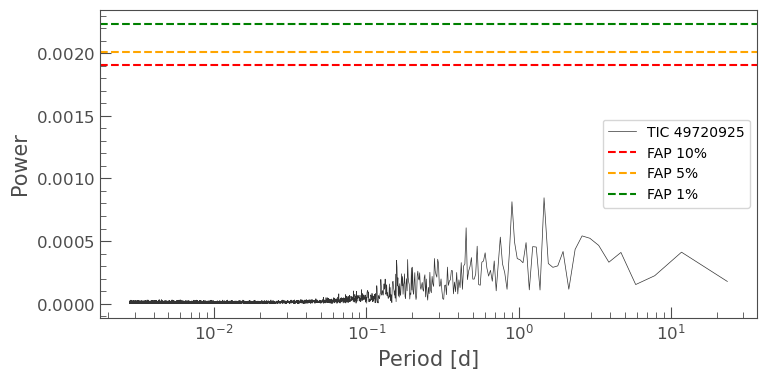

Periodo calculado: 1.4693681092036854 d
Periodo real: 1.45101


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

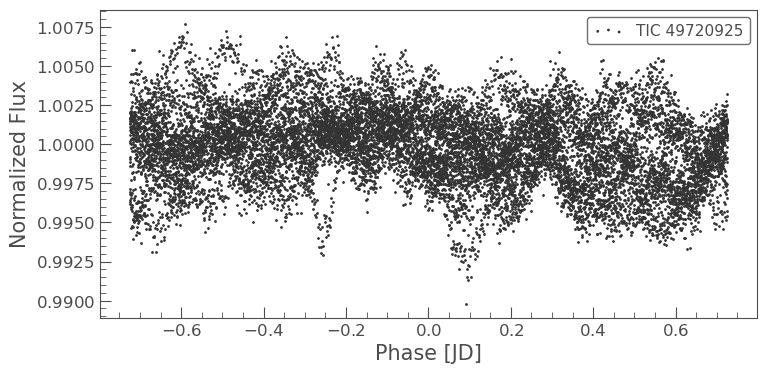

In [101]:
# OBJETO 2: HD 15629

TIC = 'TIC 49720925'
## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 18).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show() 

## Periodo del artículo
period_good=1.45101
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [127]:
## TPFPLOTTER
!python tpfplotter.py 49720925 --maglim 6 --sector 18 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC49720925_S18.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

^C

===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


     tpfplotter       

* Working on TIC49720925 (ra = 38.3357801036856, dec = 61.5217188833714) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC49720925_S18.pdf
	 --> Gaia close sources saved in file: Gaia_TIC49720925_S18.dat
	 --> Done!



# OBJETO 3: LS II +25 15

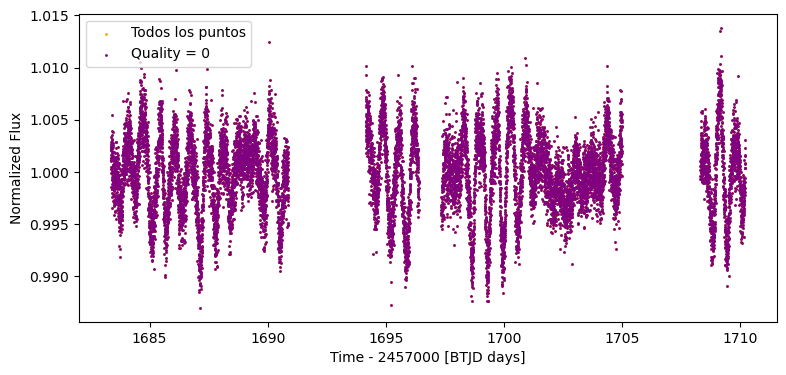

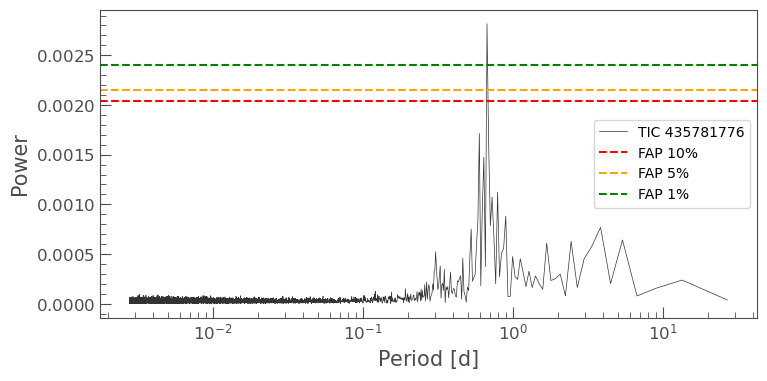

Periodo calculado: 0.6712480967975465 d
Periodo real: 0.677533


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

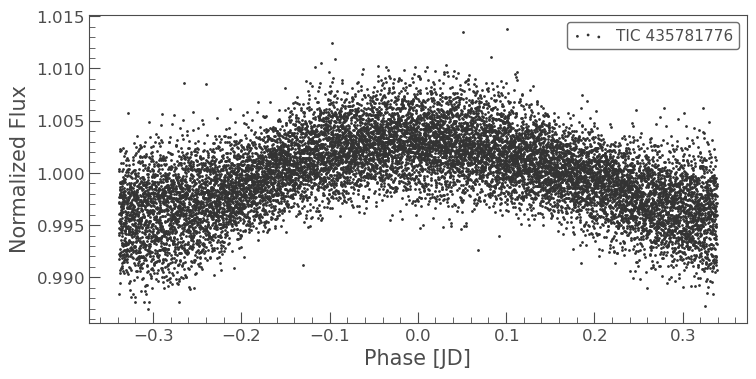

In [97]:
# OBJETO 3: LS II +25 15

TIC = 'TIC 435781776'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 14).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=0.677533
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [128]:
## TPFPLOTTER
!python tpfplotter.py 435781776 --maglim 6 --sector 14 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC435781776_S14.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC435781776 (ra = 297.70773216847, dec = 26.0020384268002) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC435781776_S14.pdf
	 --> Gaia close sources saved in file: Gaia_TIC435781776_S14.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.012961
Contaminación (%) = 1.296%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 4: * 73 Ori

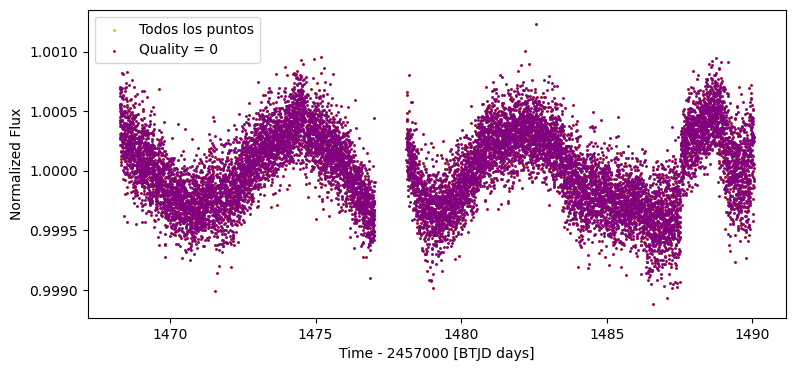

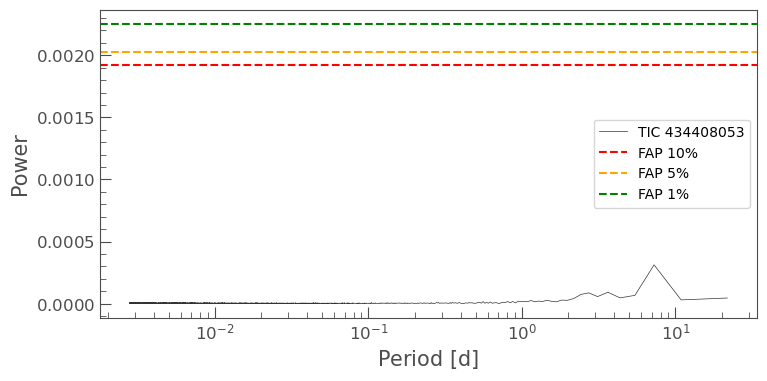

Periodo calculado: 7.2573903349587 d
Periodo real: 7.3338


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

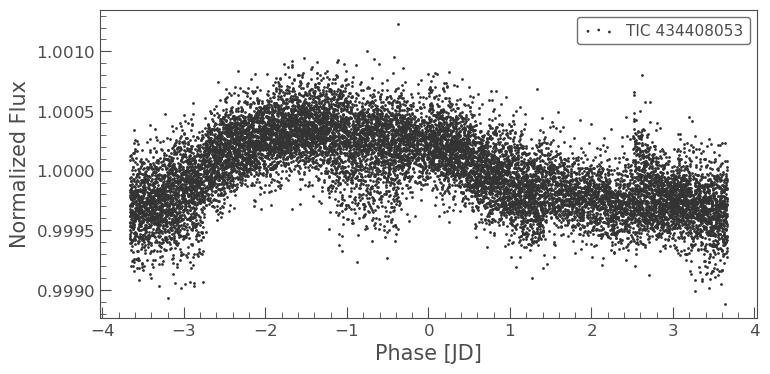

In [99]:
# OBJETO 4: * 73 Ori

TIC = 'TIC 434408053'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 6).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=7.3338
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [129]:
## TPFPLOTTER
!python tpfplotter.py 434408053 --maglim 6 --sector 6 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC434408053_S6.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC434408053 (ra = 93.937354052025, dec = 12.5510682025224) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC434408053_S6.pdf
	 --> Gaia close sources saved in file: Gaia_TIC434408053_S6.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 5: HD 239626

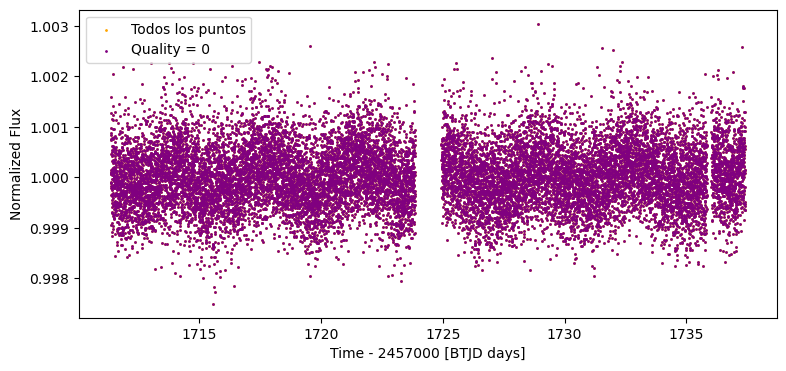

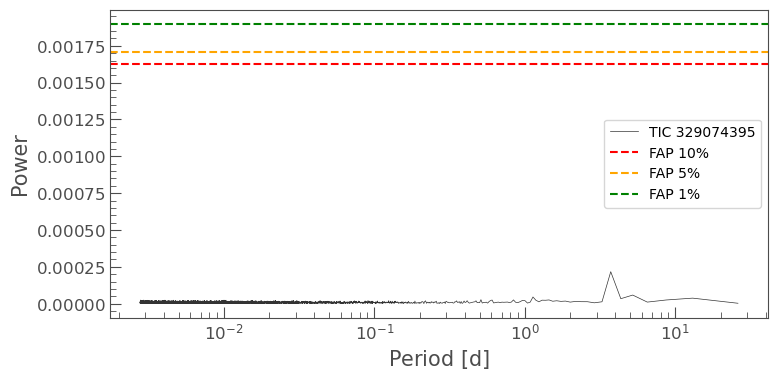

Periodo calculado: 3.720704568494804 d
Periodo real: 3.76682


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

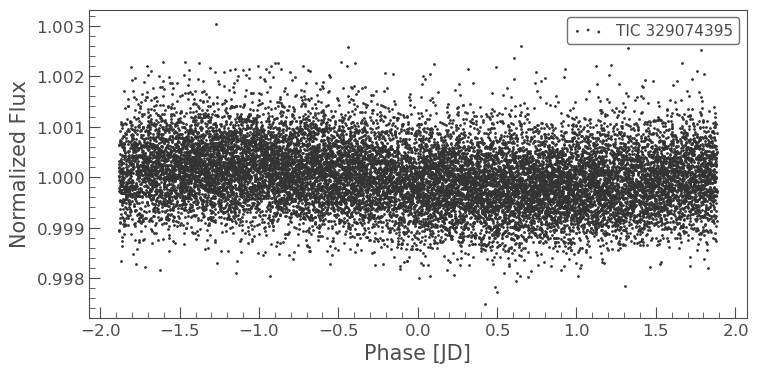

In [102]:
# OBJETO 5: HD 239626

TIC = 'TIC 329074395'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 15).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=3.76682
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [132]:
## TPFPLOTTER
!python tpfplotter.py 329074395 --maglim 6 --sector 15 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC329074395_S15.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC329074395 (ra = 319.389464783729, dec = 60.1004532216321) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC329074395_S15.pdf
	 --> Gaia close sources saved in file: Gaia_TIC329074395_S15.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 6: HD 161796

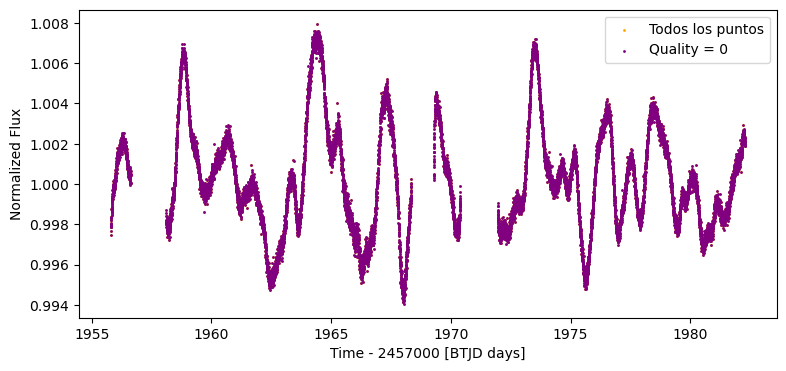

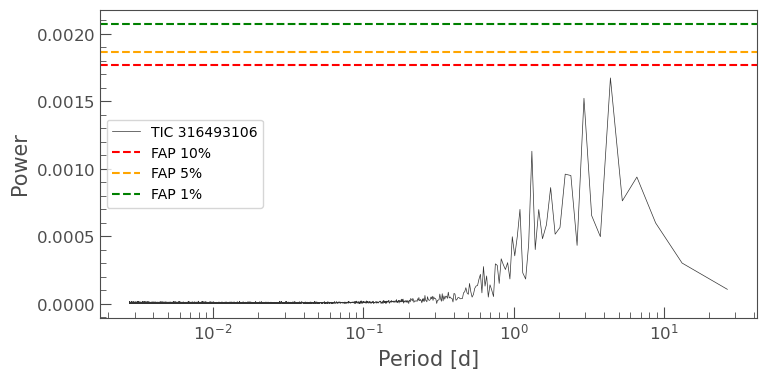

Periodo calculado: 4.414202553529435 d
Periodo real: 4.6325


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

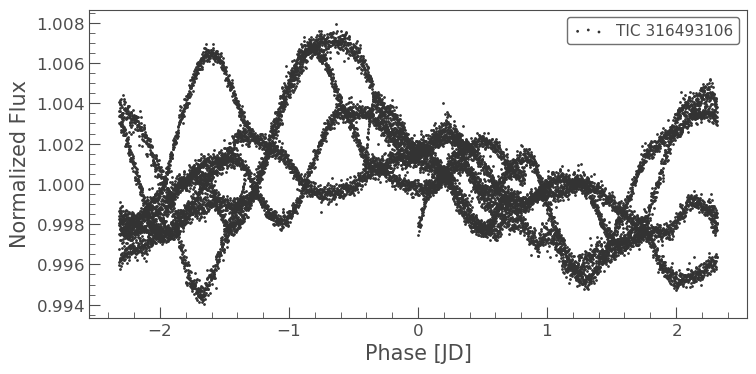

In [103]:
# OBJETO 6: HD 161796

TIC = 'TIC 316493106'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 24).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=4.6325
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [134]:
## TPFPLOTTER
!python tpfplotter.py 316493106 --maglim 6 --sector 24 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC316493106_S24.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC316493106 (ra = 266.231123357427, dec = 50.0442992732567) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC316493106_S24.pdf
	 --> Gaia close sources saved in file: Gaia_TIC316493106_S24.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 7: HD 95862

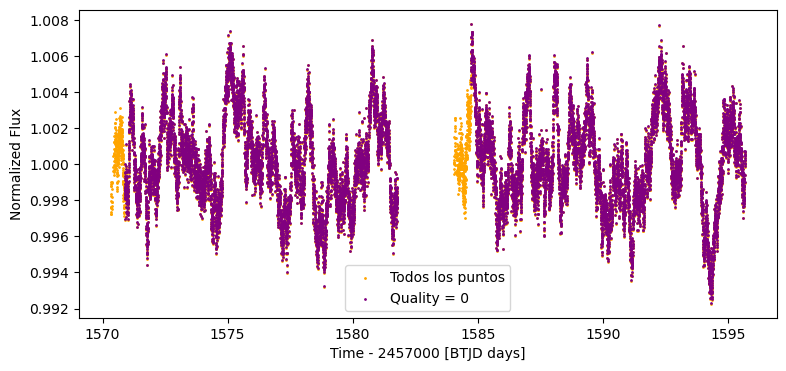

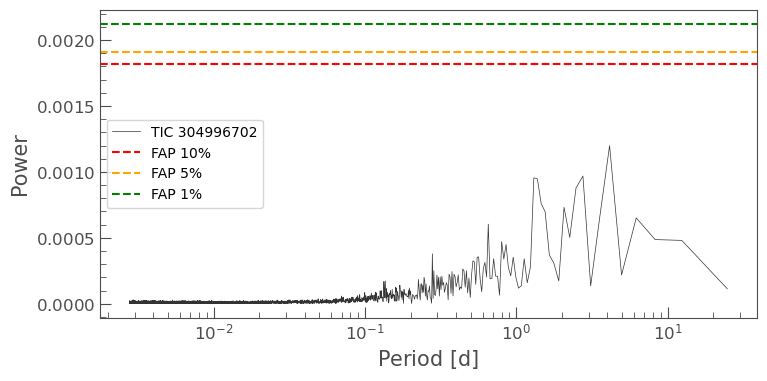

Periodo calculado: 4.133817554220134 d
Periodo real: 1.41379


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

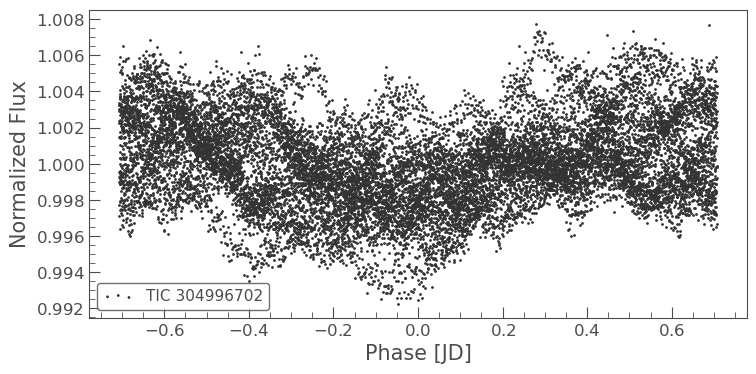

In [104]:
# OBJETO 7: HD 95862

TIC = 'TIC 304996702'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 10).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=1.41379
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [136]:
## TPFPLOTTER
!python tpfplotter.py 304996702 --maglim 6 --sector 10 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC304996702_S10.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC304996702 (ra = 165.683764167362, dec = -58.8193686360019) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC304996702_S10.pdf
	 --> Gaia close sources saved in file: Gaia_TIC304996702_S10.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.004712
Contaminación (%) = 0.471%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 8: HD 36408A

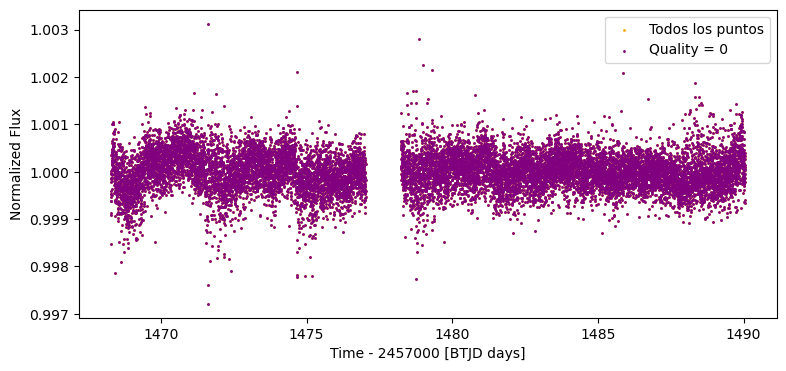

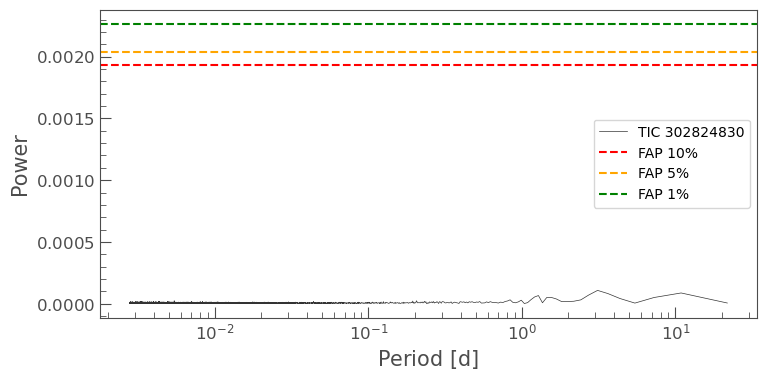

Periodo calculado: 3.1102529264874192 d
Periodo real: 3.27181


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

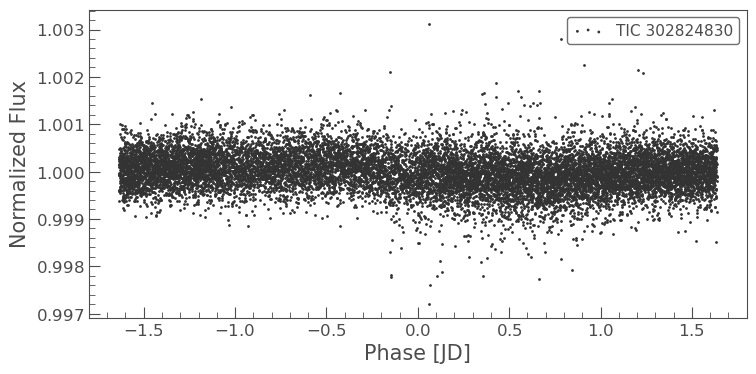

In [106]:
# OBJETO 8: HD 36408A

TIC = 'TIC 302824830'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 6).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=3.27181
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [137]:
## TPFPLOTTER
!python tpfplotter.py 302824830 --maglim 6 --sector 6 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC302824830_S6.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC302824830 (ra = 83.0589278301631, dec = 17.0581292270554) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC302824830_S6.pdf
	 --> Gaia close sources saved in file: Gaia_TIC302824830_S6.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 9: HD 3191

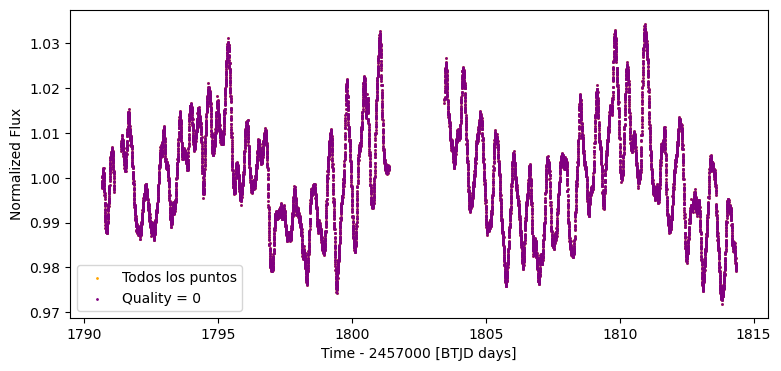

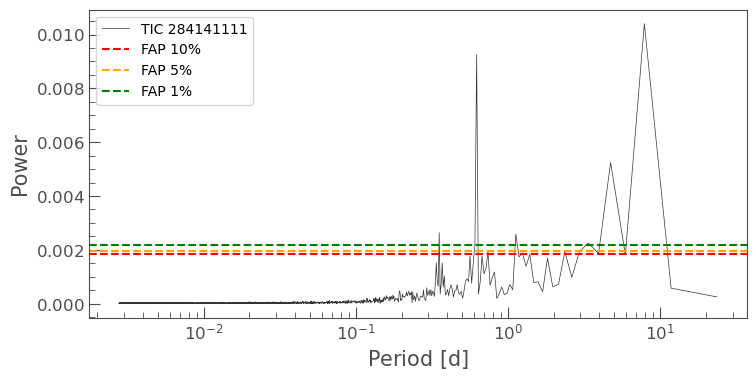

Periodo calculado: 7.895730077097597 d
Periodo real: 0.62248


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

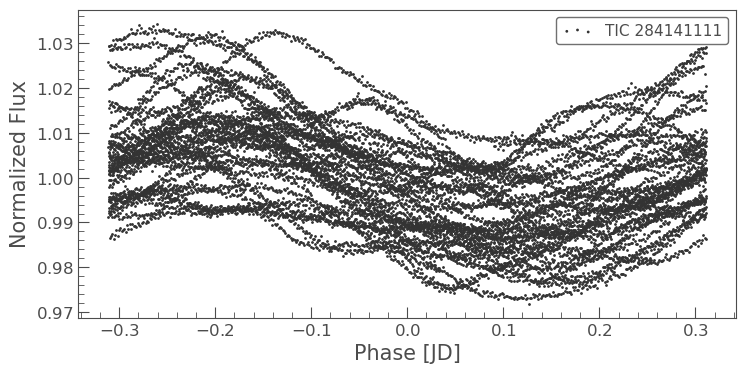

In [107]:
# OBJETO 9: HD 3191

TIC = 'TIC 284141111'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 18).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=0.62248
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [138]:
## TPFPLOTTER
!python tpfplotter.py 284141111 --maglim 6 --sector 18 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC284141111_S18.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC284141111 (ra = 8.96185024133707, dec = 61.4598100570217) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC284141111_S18.pdf
	 --> Gaia close sources saved in file: Gaia_TIC284141111_S18.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.016859
Contaminación (%) = 1.686%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 10: V* V379 Cep

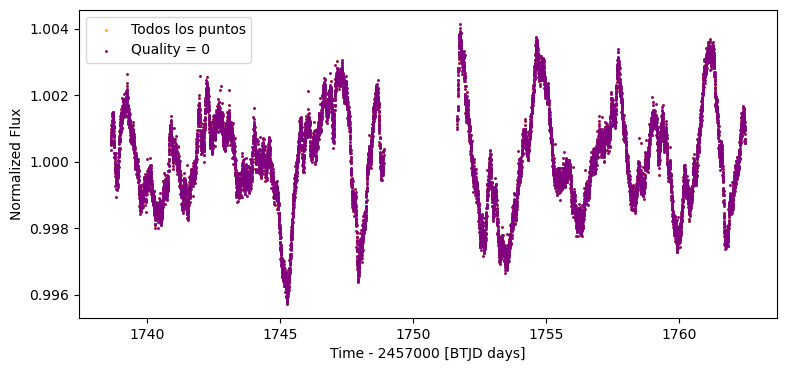

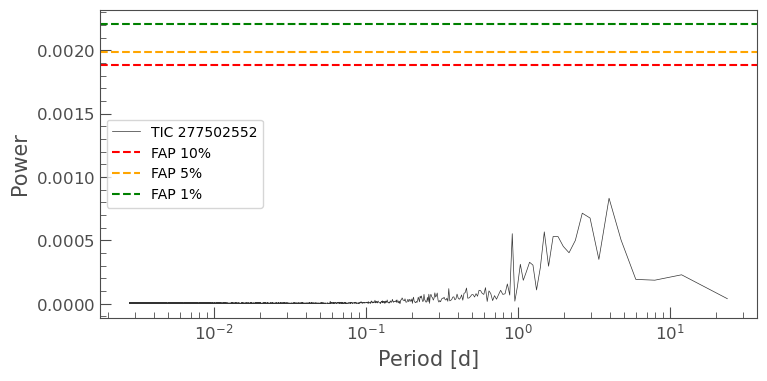

Periodo calculado: 3.9675691505999557 d
Periodo real: 0.917772


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

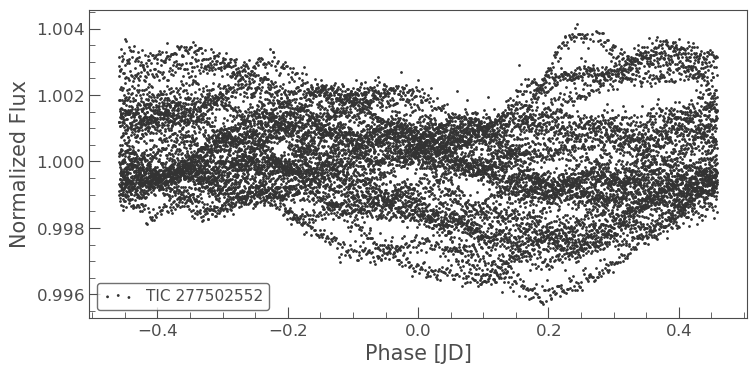

In [108]:
# OBJETO 10: V* V379 Cep

TIC = 'TIC 277502552'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 16).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=0.917772
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [139]:
## TPFPLOTTER
!python tpfplotter.py 277502552 --maglim 6 --sector 16 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC277502552_S16.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC277502552 (ra = 310.807017128181, dec = 57.1139918412392) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC277502552_S16.pdf
	 --> Gaia close sources saved in file: Gaia_TIC277502552_S16.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 11: V* T Cru

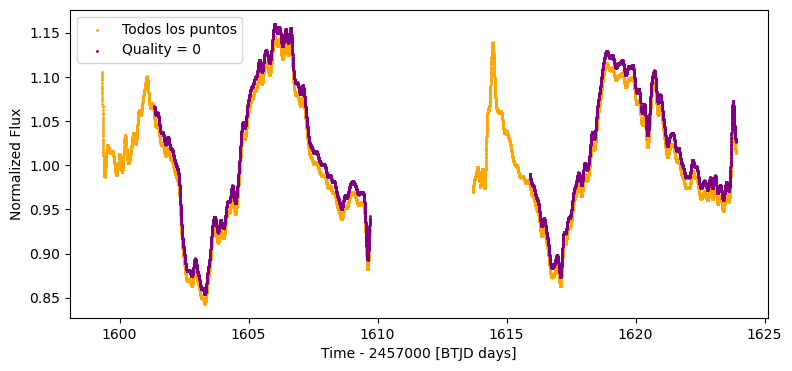

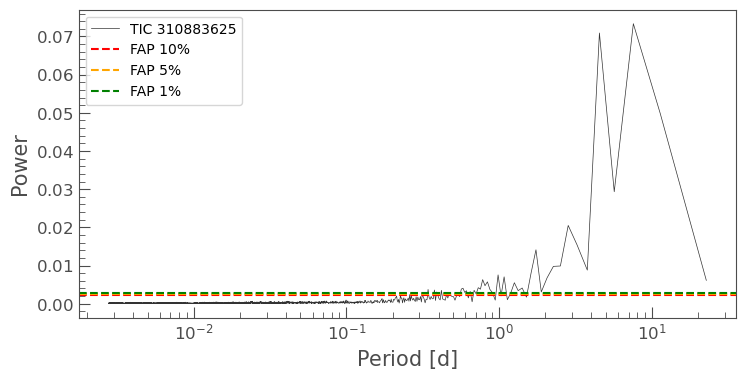

Periodo calculado: 7.515686376066999 d
Periodo real: 6.67664


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

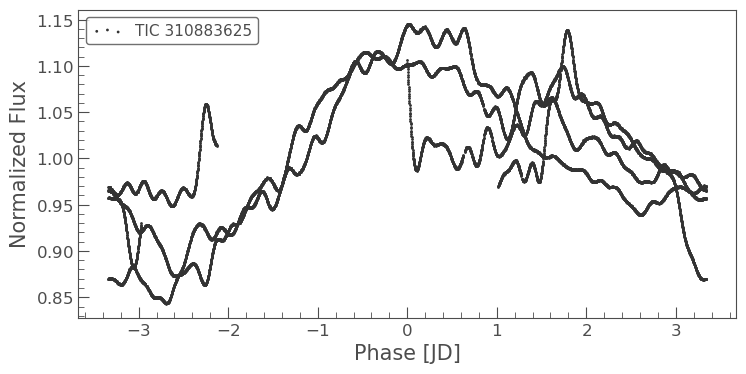

In [153]:
# OBJETO 11: V* T Cru

TIC = 'TIC 310883625'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 11).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=6.67664
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 7.515686376066999 d
Periodo real: 4.68259


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

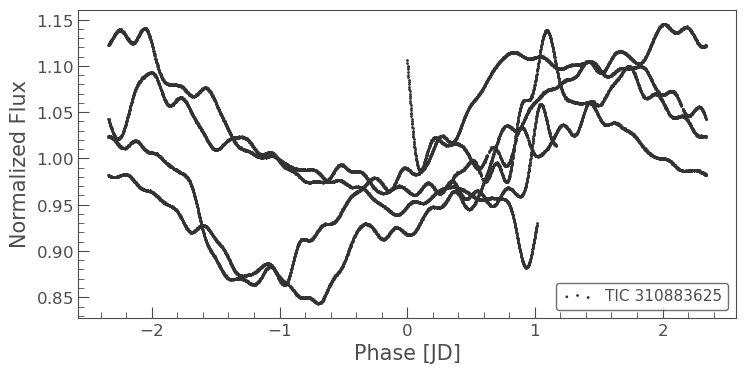

In [154]:
## El segundo periodo del artículo
period_good=4.682590
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [140]:
## TPFPLOTTER
!python tpfplotter.py 310883625 --maglim 6 --sector 11 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC310883625_S11.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC310883625 (ra = 185.33803342847, dec = -62.2816323053169) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC310883625_S11.pdf
	 --> Gaia close sources saved in file: Gaia_TIC310883625_S11.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 12: HD 75860

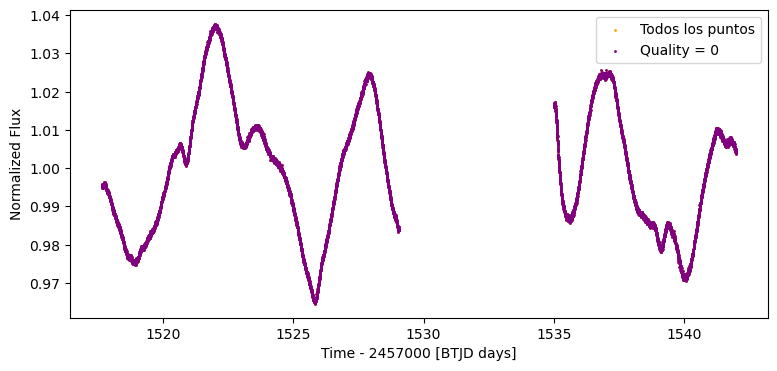

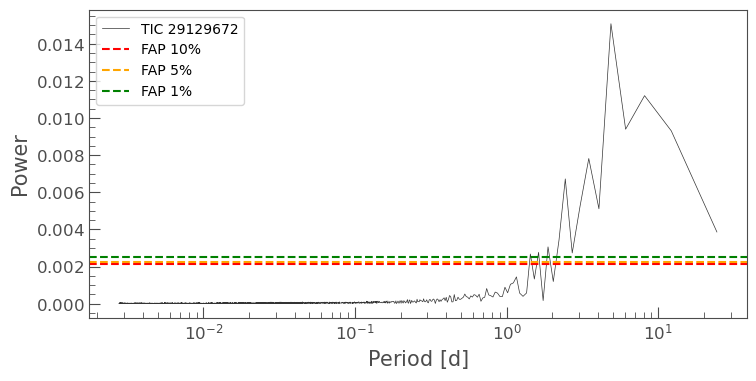

Periodo calculado: 4.870883217133906 d
Periodo real: 6.98846


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

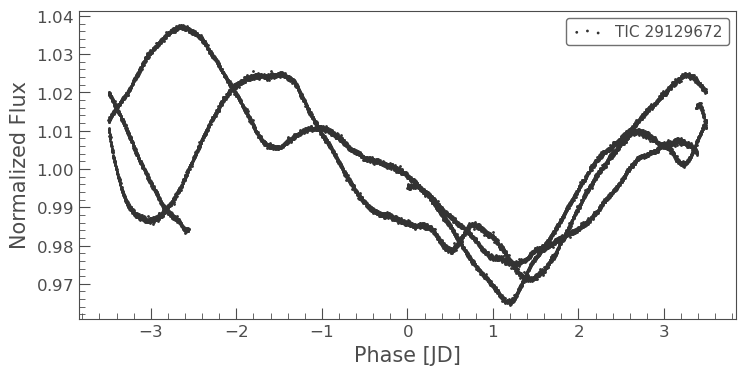

In [155]:
# OBJETO 12: HD 75860

TIC = 'TIC 29129672'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 8).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=6.98846
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 4.870883217133906 d
Periodo real: 5.02734


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

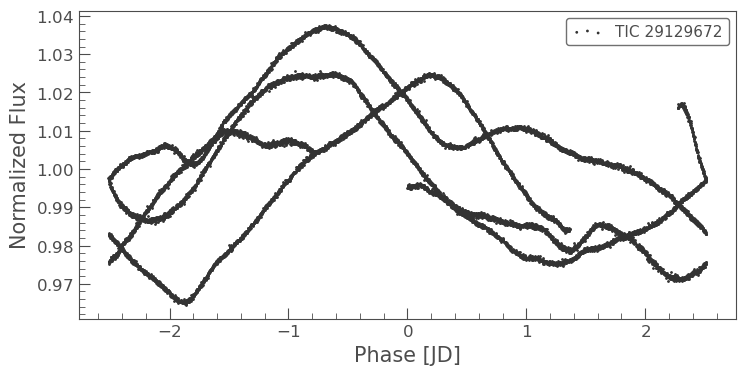

In [156]:
## El segundo periodo del artículo
period_good=5.027340
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [141]:
## TPFPLOTTER
!python tpfplotter.py 29129672 --maglim 6 --sector 8 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC29129672_S8.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC29129672 (ra = 132.721841497516, dec = -43.7515114431304) ...
	 WARNING! There are more than one DR3 ids for this DR2 ID, assuming the first one...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC29129672_S8.pdf
	 --> Gaia close sources saved in file: Gaia_TIC29129672_S8.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 17.777652
Contaminación (%) = 1777.765%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


## Probamos con el sector 9

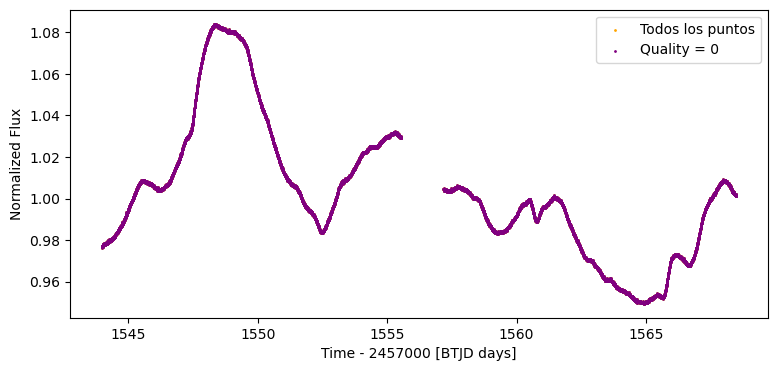

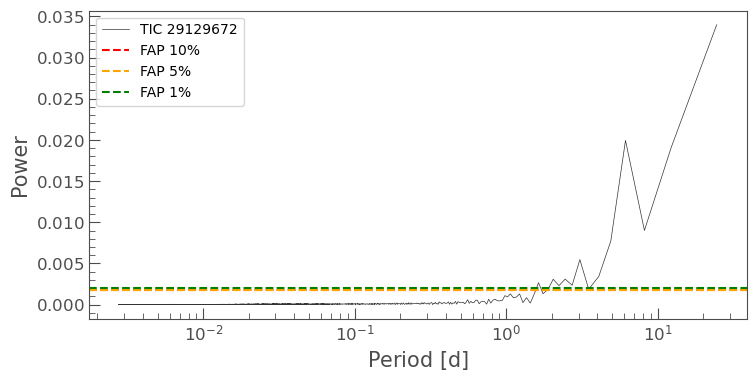

Periodo calculado: 24.495491261762936 d
Periodo real: 6.98846


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

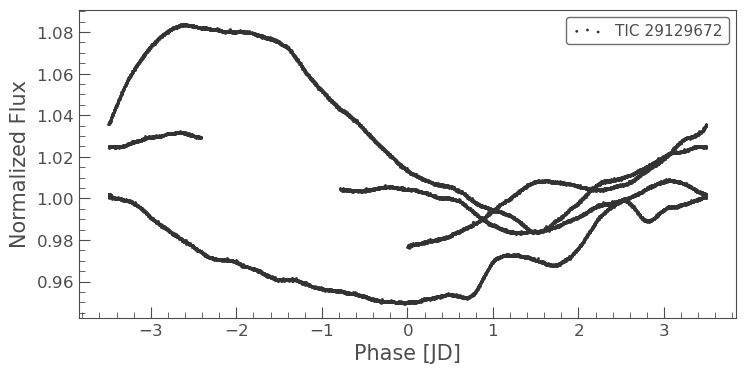

In [3]:
# OBJETO 12: HD 75860

TIC = 'TIC 29129672'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 9).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=6.98846
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 24.495491261762936 d
Periodo real: 5.02734


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

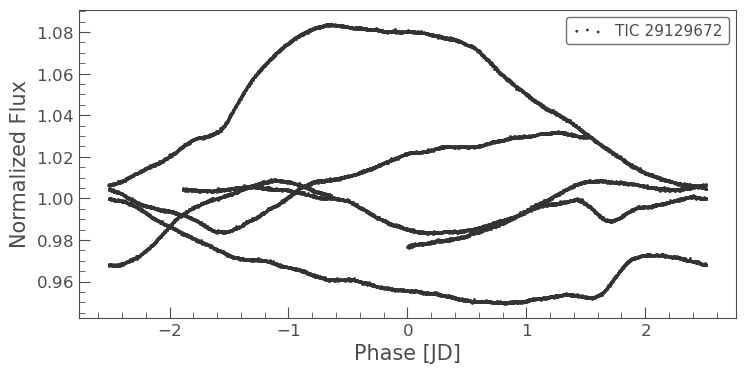

In [4]:
## El segundo periodo del artículo
period_good=5.027340
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [5]:
## TPFPLOTTER
!python tpfplotter.py 29129672 --maglim 6 --sector 9 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC29129672_S9.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

Workaround solutions for the Gaia Archive issues following the infrastructure upgrade: https://www.cosmos.esa.int/web/gaia/news#WorkaroundArchive
     tpfplotter       

* Working on TIC29129672 (ra = 132.721841497516, dec = -43.7515114431304) ...
	 WARNING! There are more than one DR3 ids for this DR2 ID, assuming the first one...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC29129672_S9.pdf
	 --> Gaia close sources saved in file: Gaia_TIC29129672_S9.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 17.910577
Contaminación (%) = 1791.058%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


## Todos los sectores combined

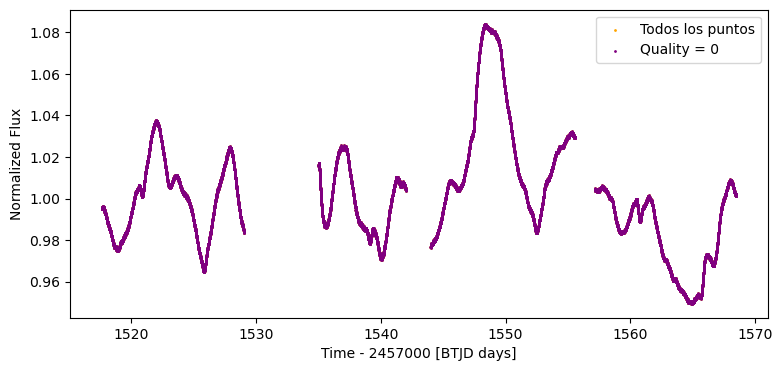

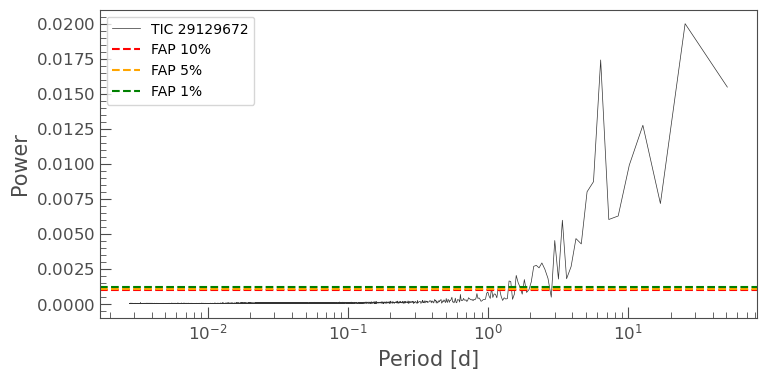

Periodo calculado: 25.414531873070132 d
Periodo real: 6.98846


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

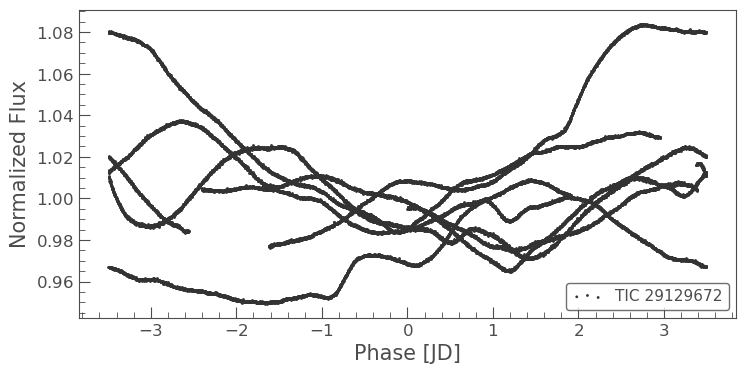

In [6]:
# OBJETO 12: HD 75860

TIC = 'TIC 29129672'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author='SPOC', sector=[8, 9]).download_all()
lc = sector_data.stitch().remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=6.98846
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 25.414531873070132 d
Periodo real: 5.02734


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

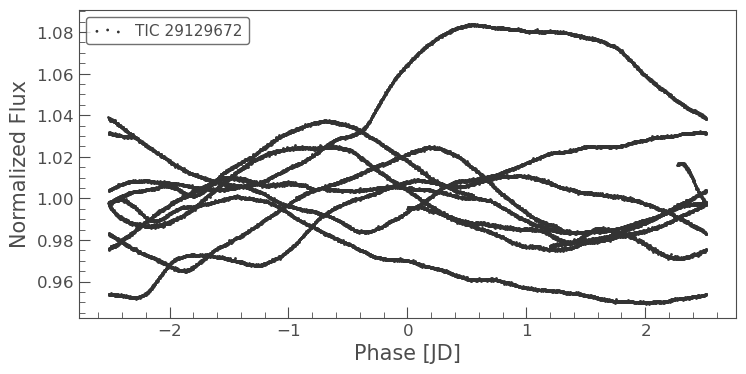

In [7]:
## El segundo periodo del artículo
period_good=5.027340
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

# OBJETO 13: CD-53 4543

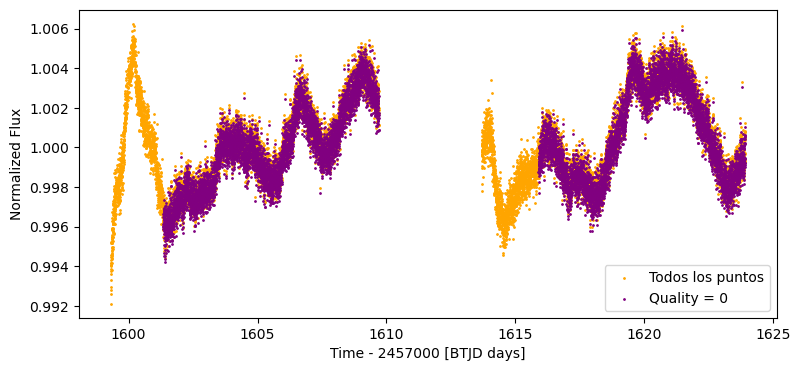

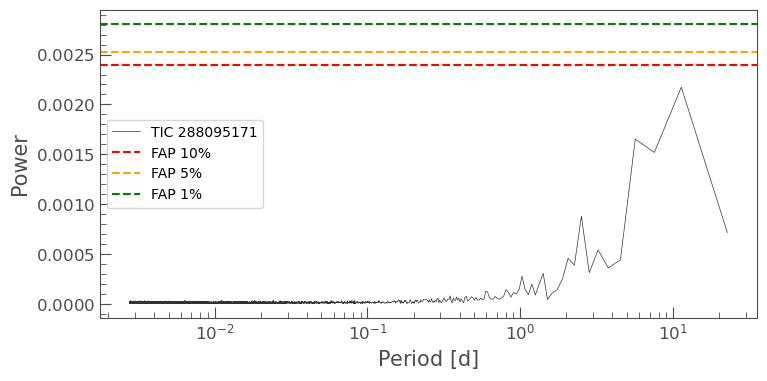

Periodo calculado: 11.273413159256052 d
Periodo real: 12.1547


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

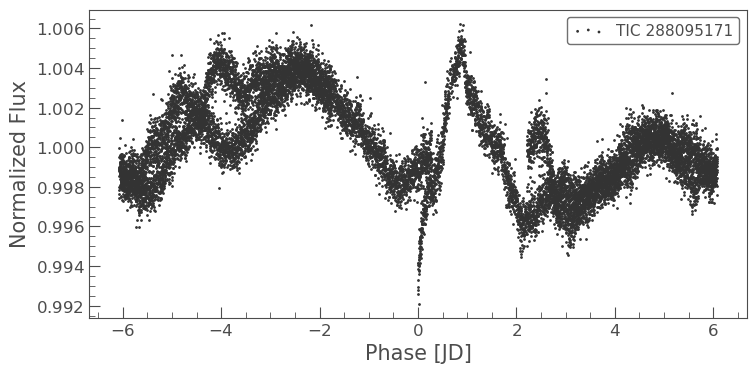

In [157]:
# OBJETO 13: CD-53 4543

TIC = 'TIC 288095171'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 11).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=12.1547
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 11.273413159256052 d
Periodo real: 5.39563


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

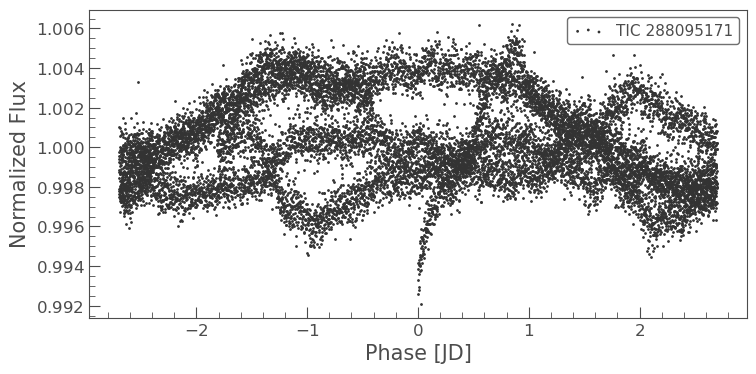

In [158]:
## El segundo periodo del artículo
period_good=5.395630
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [142]:
## TPFPLOTTER
!python tpfplotter.py 288095171 --maglim 6 --sector 11 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC288095171_S11.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC288095171 (ra = 185.062759171632, dec = -53.9254018986245) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC288095171_S11.pdf
	 --> Gaia close sources saved in file: Gaia_TIC288095171_S11.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.010945
Contaminación (%) = 1.095%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 14: V* LN Hay

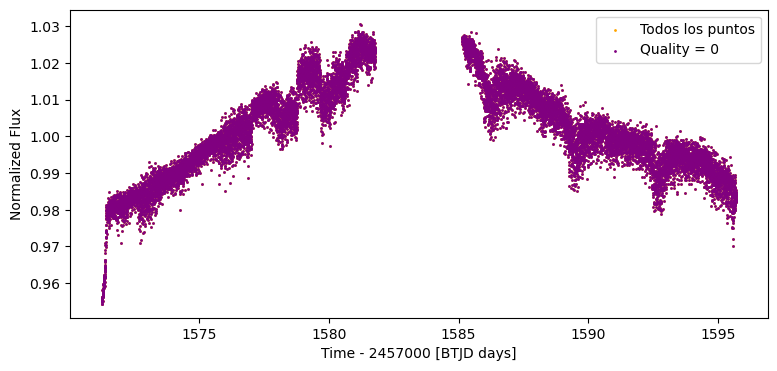

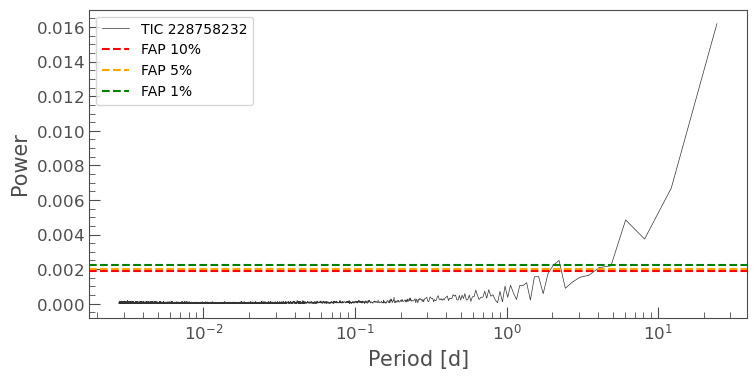

Periodo calculado: 24.418253929532966 d
Periodo real: 10.1443


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

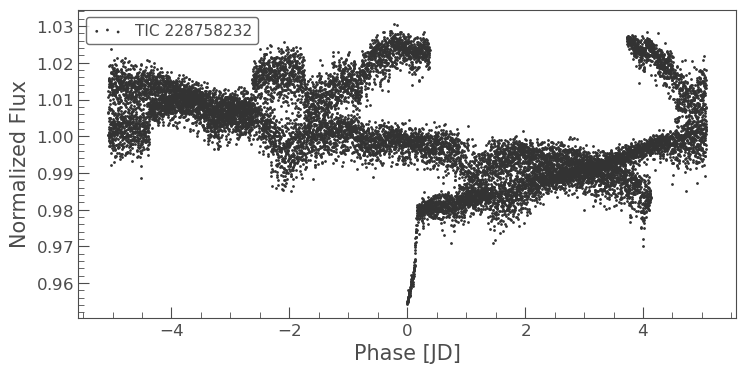

In [159]:
# OBJETO 14: V* LN Hay

TIC = 'TIC 228758232'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 10).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=10.1443
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 24.418253929532966 d
Periodo real: 5.5826


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

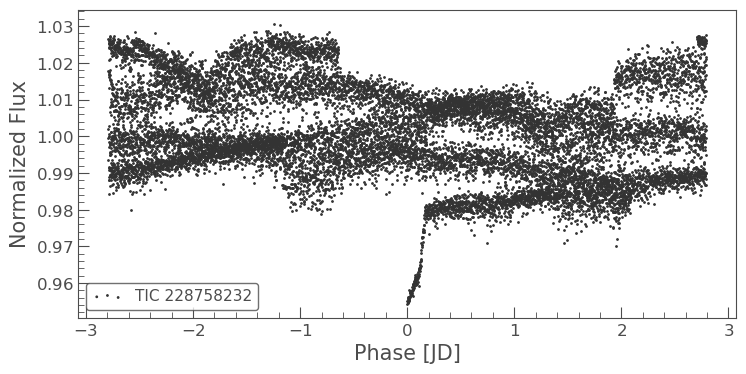

In [160]:
## El segundo periodo del artículo
period_good=5.582600
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [143]:
## TPFPLOTTER
!python tpfplotter.py 228758232 --maglim 6 --sector 10 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC228758232_S10.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC228758232 (ra = 194.1255438763, dec = -26.4602904304379) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC228758232_S10.pdf
	 --> Gaia close sources saved in file: Gaia_TIC228758232_S10.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 15: HD 194279

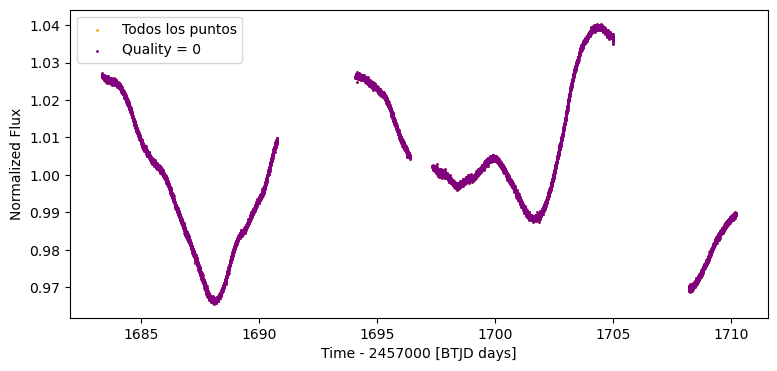

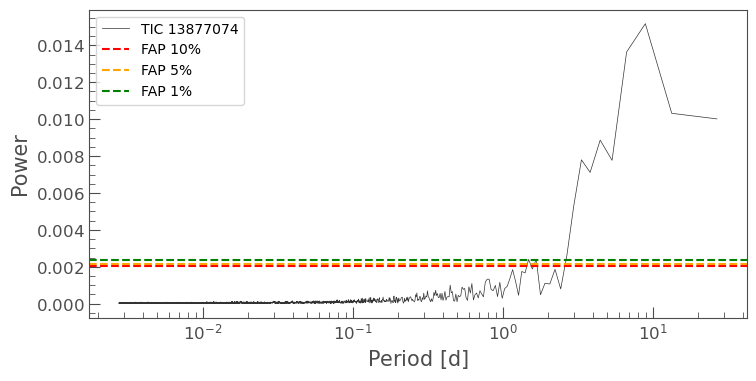

Periodo calculado: 8.94966576939881 d
Periodo real: 10.925


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

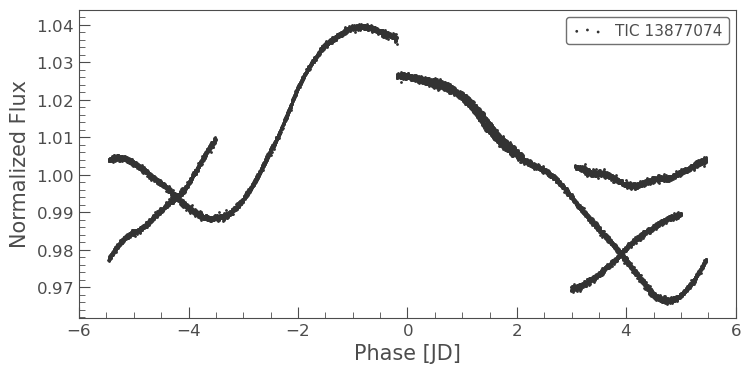

In [161]:
# OBJETO 15: HD 194279

TIC = 'TIC 13877074'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 14).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=10.925
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 8.94966576939881 d
Periodo real: 6.8243


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

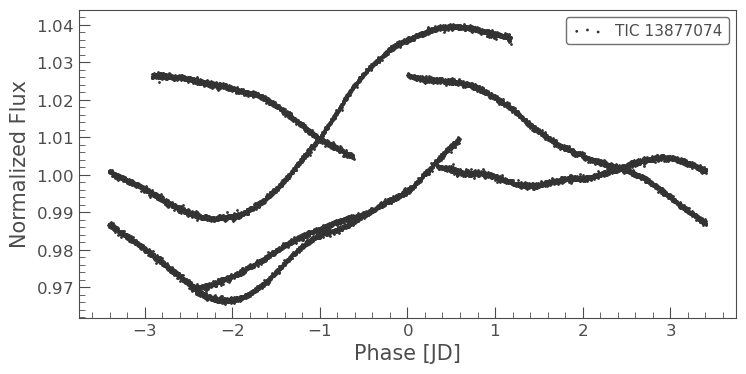

In [162]:
## El segundo periodo del artículo
period_good=6.824300
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [144]:
## TPFPLOTTER
!python tpfplotter.py 13877074 --maglim 6 --sector 14 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC13877074_S14.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC13877074 (ra = 305.825687607365, dec = 40.7590546636488) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC13877074_S14.pdf
	 --> Gaia close sources saved in file: Gaia_TIC13877074_S14.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.122948
Contaminación (%) = 12.295%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 16: * l Pup

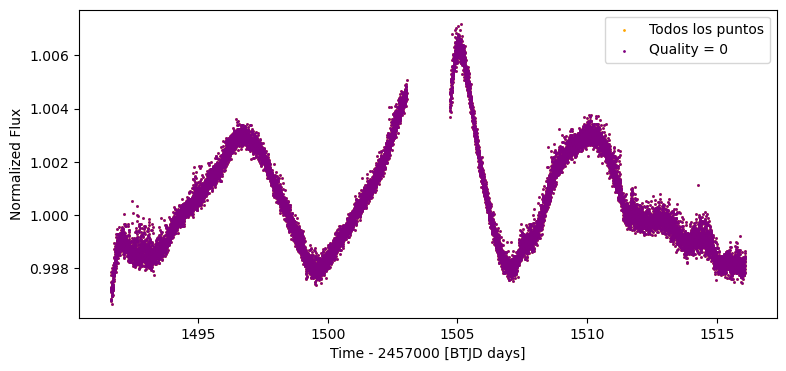

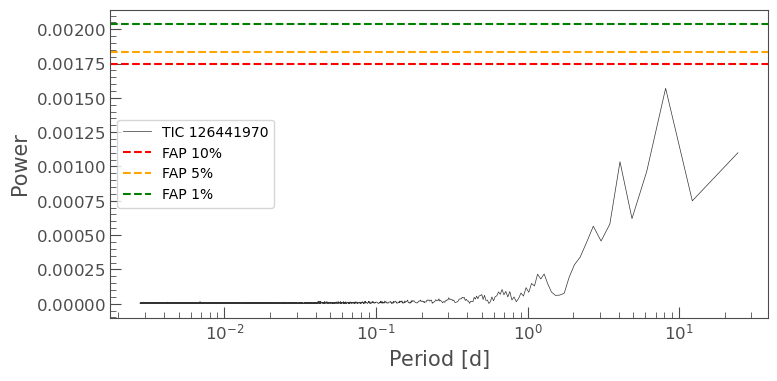

Periodo calculado: 8.151446955536661 d
Periodo real: 7.15922


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

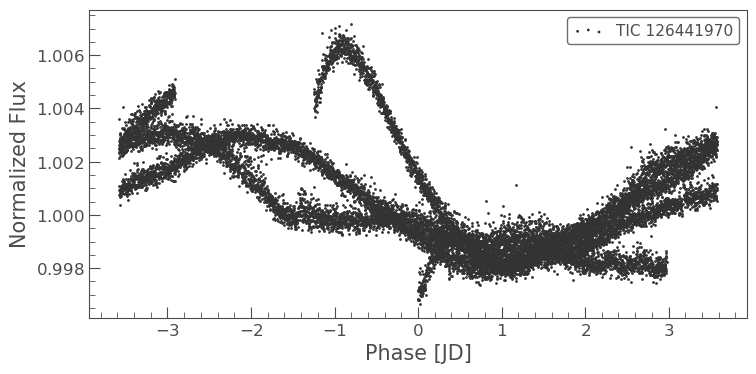

In [163]:
# OBJETO 16: * l Pup

TIC = 'TIC 126441970'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 7).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=7.15922
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 8.151446955536661 d
Periodo real: 3.91501


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

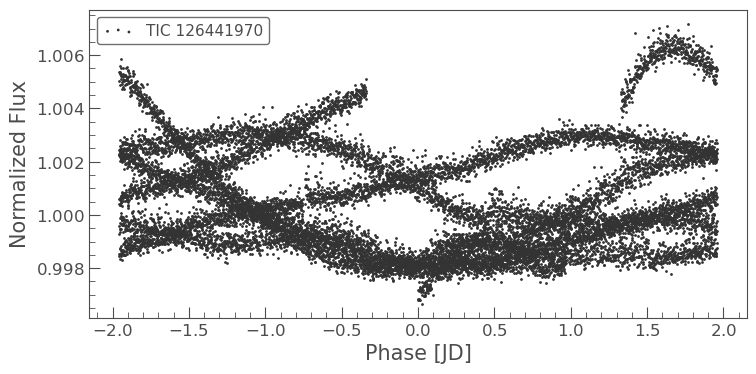

In [164]:
## El segundo periodo del artículo
period_good=3.915010
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [145]:
## TPFPLOTTER
!python tpfplotter.py 126441970 --maglim 6 --sector 7 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC126441970_S7.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC126441970 (ra = 115.951948902212, dec = -28.9548318482958) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC126441970_S7.pdf
	 --> Gaia close sources saved in file: Gaia_TIC126441970_S7.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 17: HD 190603

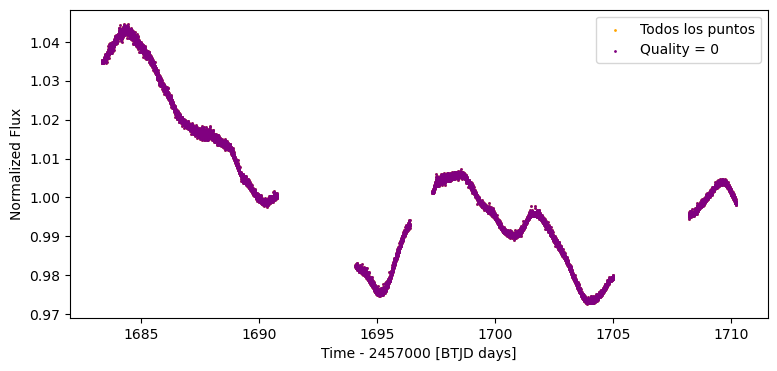

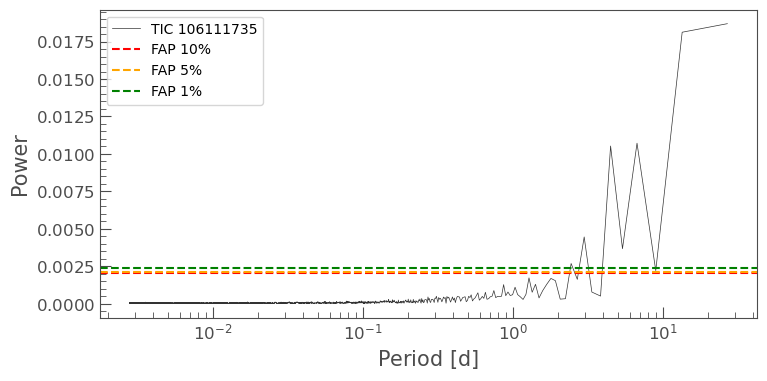

Periodo calculado: 26.84874358053685 d
Periodo real: 7.36621


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

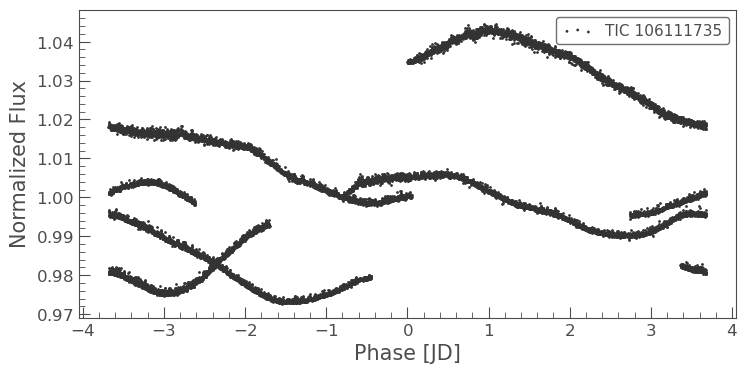

In [165]:
# OBJETO 17: HD 190603

TIC = 'TIC 106111735'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 14).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=7.36621
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 26.84874358053685 d
Periodo real: 4.37172


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

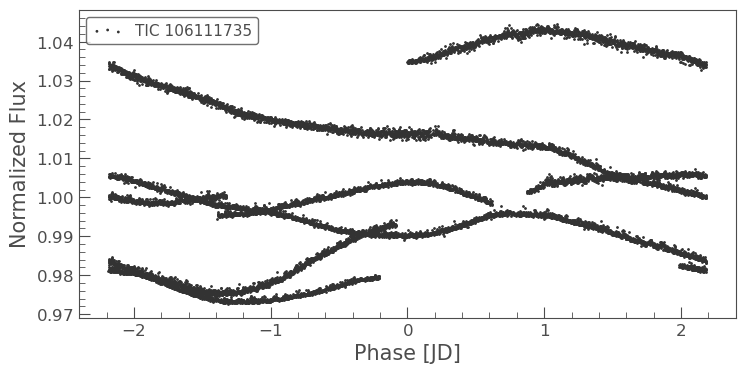

In [166]:
## El segundo periodo del artículo
period_good=4.371720
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [146]:
## TPFPLOTTER
!python tpfplotter.py 106111735 --maglim 6 --sector 14 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC106111735_S14.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC106111735 (ra = 301.150726688937, dec = 32.2185978063545) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC106111735_S14.pdf
	 --> Gaia close sources saved in file: Gaia_TIC106111735_S14.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.005327
Contaminación (%) = 0.533%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 18: HD 237204

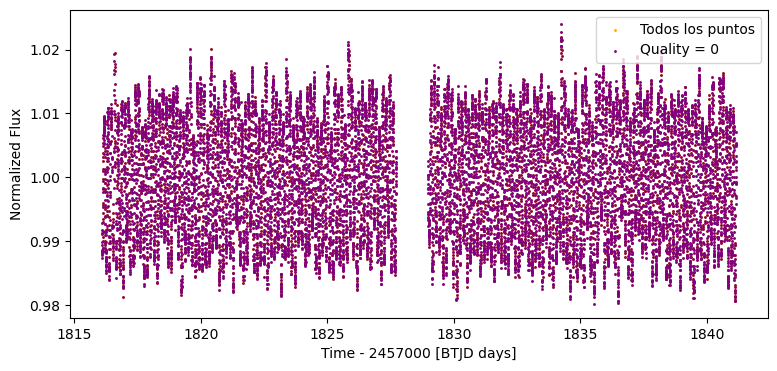

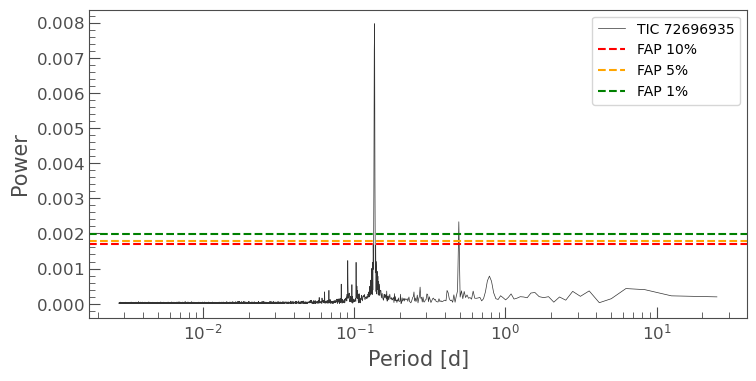

Periodo calculado: 0.13621507805300118 d
Periodo real: 0.543462


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

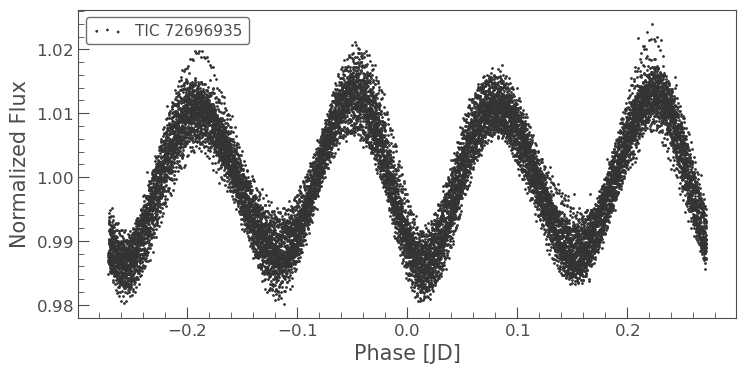

In [116]:
# OBJETO 18: HD 237204
#Posible alias

TIC = 'TIC 72696935'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 19).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=0.543462
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [147]:
## TPFPLOTTER
!python tpfplotter.py 72696935 --maglim 6 --sector 19 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC72696935_S19.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC72696935 (ra = 60.097006169339, dec = 56.9015996000738) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC72696935_S19.pdf
	 --> Gaia close sources saved in file: Gaia_TIC72696935_S19.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 19: HD 213405

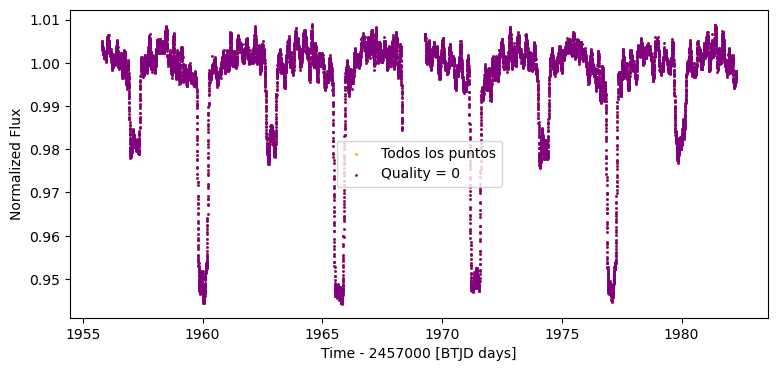

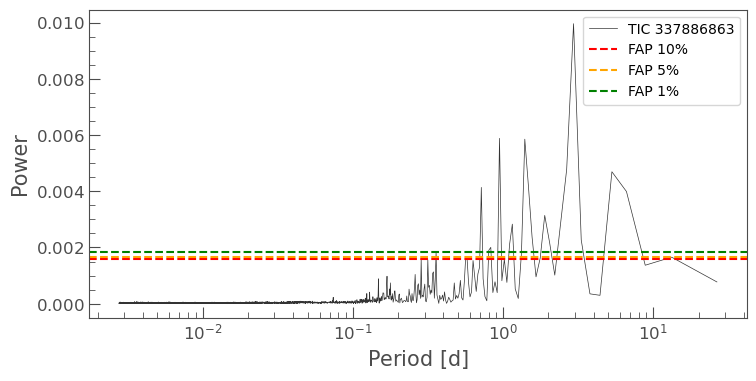

Periodo calculado: 2.9426126664885084 d
Periodo real: 5.70081


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

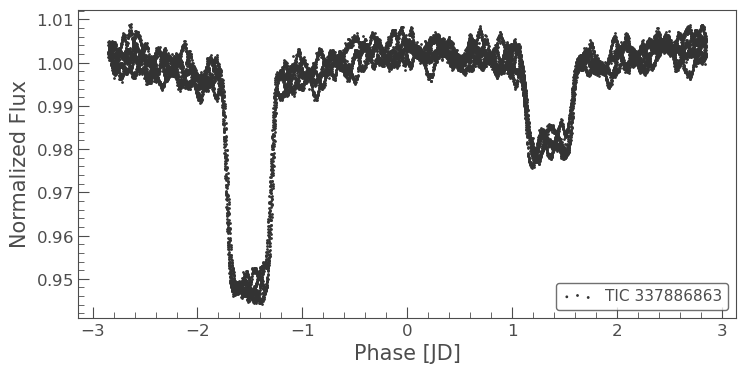

In [117]:
# OBJETO 19: HD 213405

TIC = 'TIC 337886863'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 24).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=5.70081
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [148]:
## TPFPLOTTER
!python tpfplotter.py 337886863 --maglim 6 --sector 24 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC337886863_S24.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC337886863 (ra = 337.323052048776, dec = 65.1133243339728) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC337886863_S24.pdf
	 --> Gaia close sources saved in file: Gaia_TIC337886863_S24.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 20: * 6 Cep

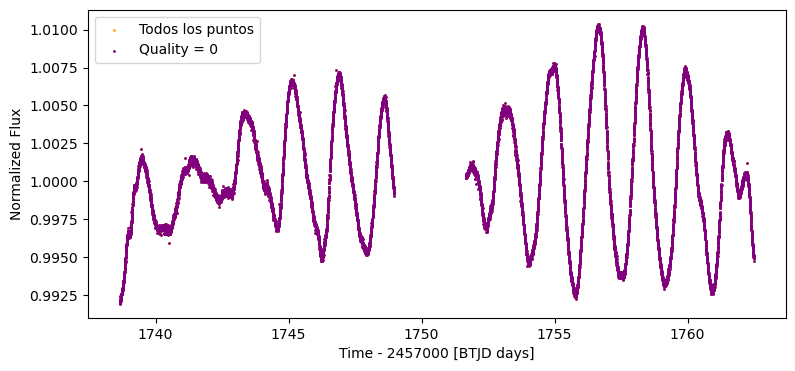

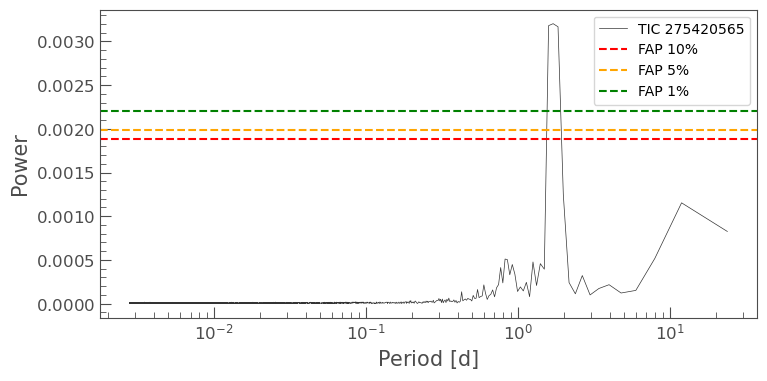

Periodo calculado: 1.702297264542462 d
Periodo real: 1.69606


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

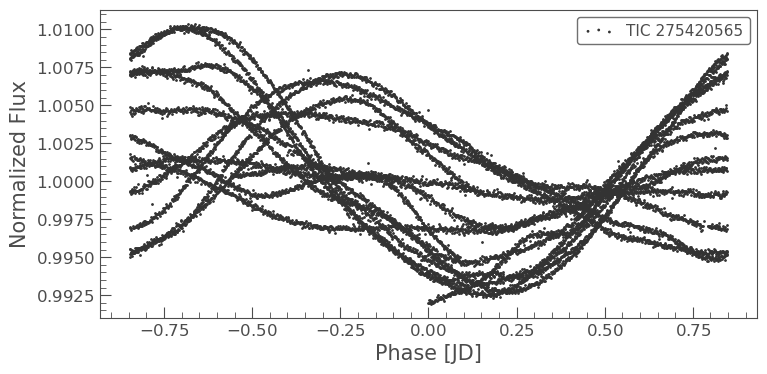

In [118]:
# OBJETO 20: * 6 Cep

TIC = 'TIC 275420565'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 16).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=1.69606
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [149]:
## TPFPLOTTER
!python tpfplotter.py 275420565 --maglim 6 --sector 16 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC275420565_S16.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC275420565 (ra = 319.842578011291, dec = 64.8718549030012) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC275420565_S16.pdf
	 --> Gaia close sources saved in file: Gaia_TIC275420565_S16.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 21: V* V454 Vel

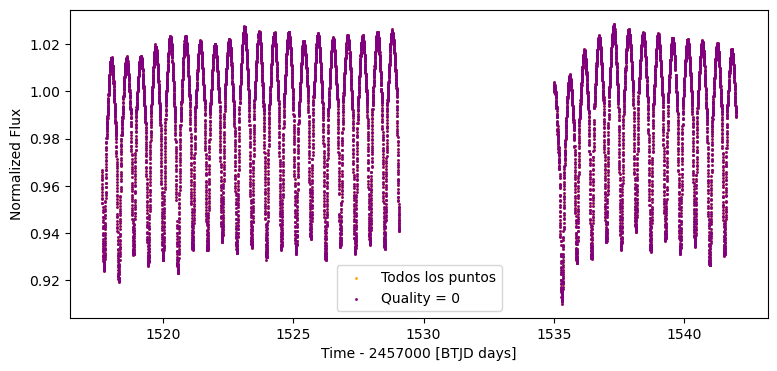

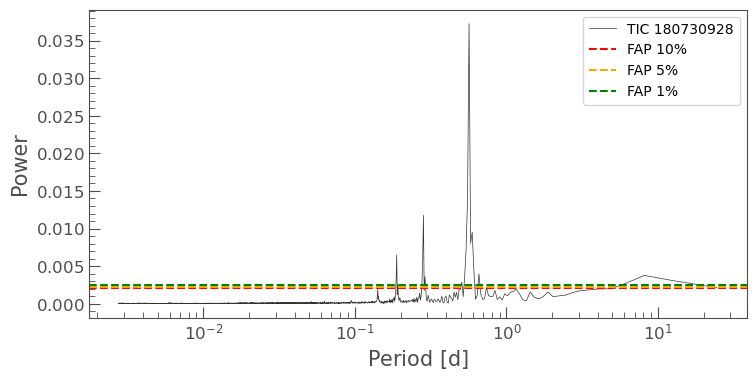

Periodo calculado: 0.5663782459105807 d
Periodo real: 0.567339


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

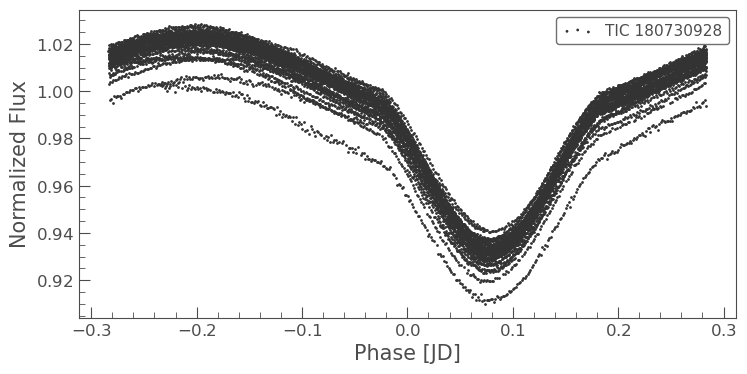

In [119]:
# OBJETO 21: V* V454 Vel

TIC = 'TIC 180730928'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 8).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=0.567339
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [150]:
## TPFPLOTTER
!python tpfplotter.py 180730928 --maglim 6 --sector 8 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC180730928_S8.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC180730928 (ra = 129.537418377037, dec = -40.0810872397445) ...
	 WARNING! There are more than one DR3 ids for this DR2 ID, assuming the first one...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC180730928_S8.pdf
	 --> Gaia close sources saved in file: Gaia_TIC180730928_S8.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 70.789564
Contaminación (%) = 7078.956%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# OBJETO 22: HD 34921

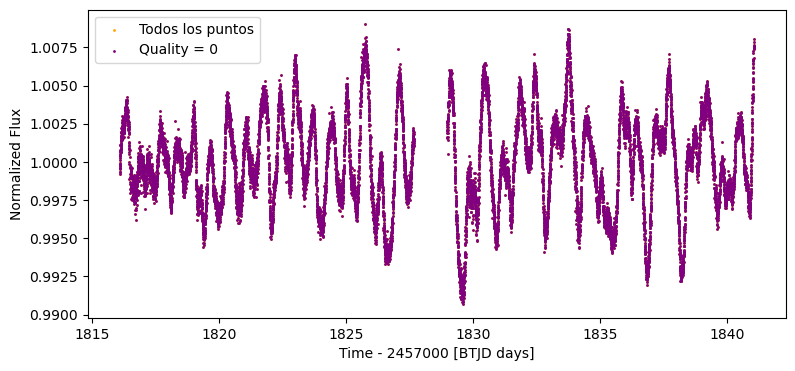

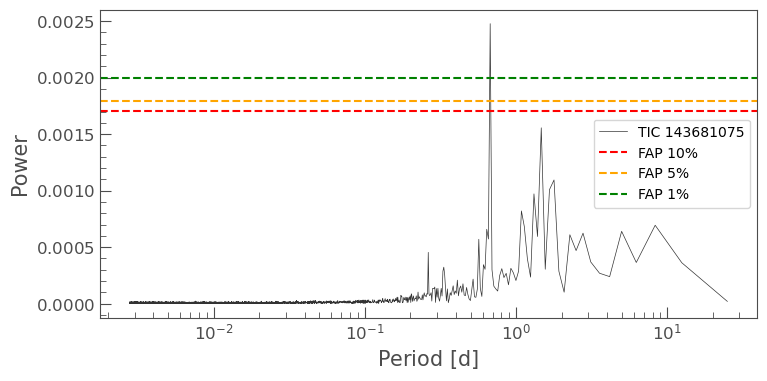

Periodo calculado: 0.6743279916933863 d
Periodo real: 1.33982


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

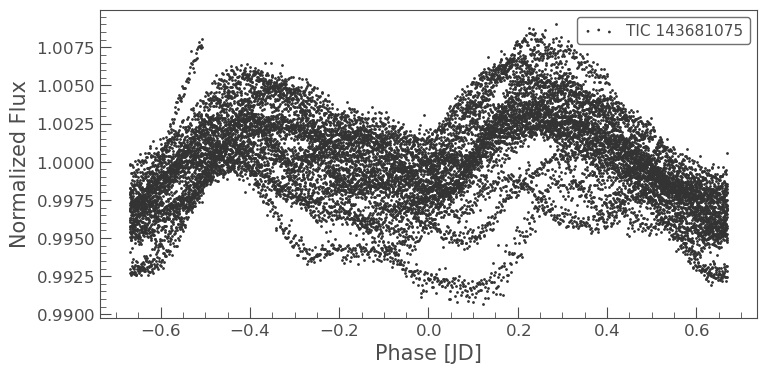

In [120]:
# OBJETO 22: HD 34921

TIC = 'TIC 143681075'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 19).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=1.33982
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

In [151]:
## TPFPLOTTER
!python tpfplotter.py 143681075 --maglim 6 --sector 19 --SAVEGAIA

## CONTAMINACIÓN
filename = "Gaia_TIC143681075_S19.dat"
data = np.genfromtxt(
    filename, 
    dtype=None, 
    encoding='utf-8', 
    names=True
)
is_target = data['ID'] == 1
m_target = data['Gmag'][is_target][0]
Gmag = data['Gmag']
InAper = data['InAper']
Gmag_cont = Gmag[(InAper == 1) & (~is_target)]
flux_ratios = 10**(-0.4 * (Gmag_cont - m_target))
sum_flux_ratio = np.sum(flux_ratios)

print("\n===== RESULTADOS =====")
print(f"Contaminación (fracción) = {sum_flux_ratio:.6f}")
print(f"Contaminación (%) = {sum_flux_ratio*100:.3f}%")

     tpfplotter       

* Working on TIC143681075 (ra = 80.646796756559, dec = 37.6760111880942) ...
	 --> Target found in the CTL!
	 --> Using pipeline aperture...
	 --> TPF plot written in file: TPF_Gaia_TIC143681075_S19.pdf
	 --> Gaia close sources saved in file: Gaia_TIC143681075_S19.dat
	 --> Done!


===== RESULTADOS =====
Contaminación (fracción) = 0.000000
Contaminación (%) = 0.000%


C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
